# CONTROLLABILITY


In [ ]:
!pip install -q tellurium
!pip install -q controlSBML

In [25]:
import tellurium as te
import controlSBML as ctl
import numpy as np

# Helpers

In [10]:
TEST_MODEL = """
S1 -> S2; k1*S1
S2 -> ; k2*S2

$S1 = 3
k1 = 1
k2 = 1
S2 = 0
"""

In [49]:
# Function that adjust model parameters
def plotModel(model, title="", is_plot=True, times=np.linspace(0, 5, 50), **kwargs):
    """
    Plots the simulation with the specified parameter values.
    
    Parameters
    ----------
    model: str either antimony or URL
    is_plot: bool
    kwargs: dict
        key: parameter name
        value: parameter value
    
    Returns
    -------
    NamedArray
    """
    if "http" in model:
        rr = te.loadSBML(model)
    else:
        rr = te.loada(model)
    for name, value in kwargs.items():
        rr[name] = value
    simulation_results = rr.simulate(times[0], times[-1], len(times))
    if is_plot:
        rr.plot(simulation_results, title=title)
    return simulation_results
    
# TESTS
results = plotModel(TEST_MODEL, is_plot=False)
assert("NamedArray" in str(type(results)))
print("OK")

OK


# Controllability

Consider a system with input $u(t)$ and output $y(t)$ that we want to regulate over the region $y_L \leq y(t) \leq y_H$. The system is controllable if there are values of $u(t)$ such that $y(t)$ can achieve the desired values.

In [40]:
MODEL1 = """
S1 -> S2; k1*S1
S2 -> ; k2*S2

$S1 = 2
k1 = 0.5
k2 = 1.1
S2 = 0
"""

Find $S_1$ that produces $S_2 = 3$

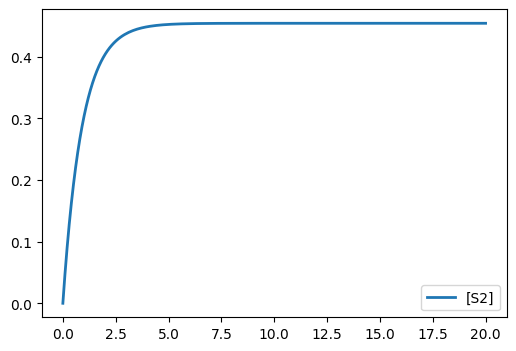

In [43]:
_ = plotModel(MODEL1, times=np.linspace(0, 20, 200), S1=1)

Not all systems are controllable.

In [44]:
MODEL2 = """
S1 -> S2; k1*S1/(1 + S1)
S2 -> ; k2*S2
$S1 = 0
k1 = 0.5
k2 = 1.1
S2 = 0
"""

Find a value of S1 that results in S2 = 2.

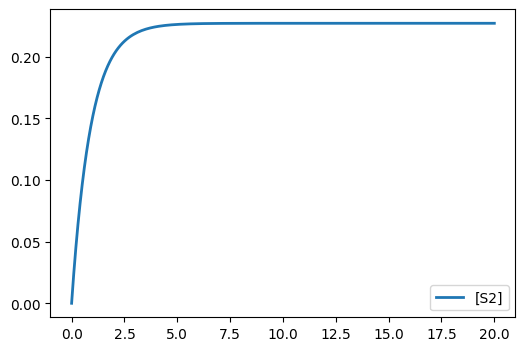

In [48]:
_ = plotModel(MODEL2, times=np.linspace(0, 20, 200), S1=1)

mTOR system

In [ ]:
mtor = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1909250003/2/Varusai2018.xml"
_ = plotModel(mtor, times=np.linspace(0, 20, 200), S1=1)

# Evaluating Controllability

# ControlSBML